Dataset:
     BMI  Age  Sugar
0  33.6   50      0
1  46.4   30      1
2  23.4   42      0
3  43.1   37      1
4  35.3   33      1
5  35.9   67      0
6  36.7   45      1
7  25.7   46      1
8  33.3   29      0
9  37.0   56      1


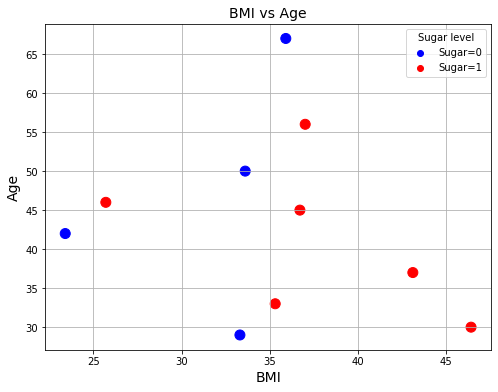


The predicted class for BMI=43.6 and Age=40 is: 1
The person has sugar

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
di = {
    'BMI': [33.6, 46.4, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 33.3, 37],
    'Age': [50, 30, 42, 37, 33, 67, 45, 46, 29, 56],
    'Sugar': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
}
data1 = pd.DataFrame(di)
data1.to_csv("NewDataset.csv", index=False)
print("Dataset:\n", data1)
colors = data1['Sugar'].map({0: 'blue', 1: 'red'})
plt.figure(figsize=(8, 6))
plt.scatter(data1['BMI'], data1['Age'], c=colors, s=100)
plt.title('BMI vs Age', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.scatter([], [], color='blue', label='Sugar=0')
plt.scatter([], [], color='red', label='Sugar=1')
plt.legend(title='Sugar level')
plt.grid(True)
plt.show()
X = data1[['BMI', 'Age']]
y = data1['Sugar']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=0
)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
new_data = pd.DataFrame([[43.6, 40]], columns=['BMI', 'Age'])
new_data_scaled = scaler.transform(new_data)
pred = knn.predict(new_data_scaled)
print(f"\nThe predicted class for BMI=43.6 and Age=40 is: {pred[0]}")
if pred[0] == 0:
    print("The person has no sugar")
else:
    print("The person has sugar")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data1 = pd.read_csv('tennisdata.csv')
print("Original Data:\n", data1)
x = data1.drop('PlayTennis', axis=1).copy()
y = data1['PlayTennis']
print("\nFeatures (X):\n", x)
print("\nTarget (Y):\n", y)
label_encoders = {}
for column in x.columns:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column])
    label_encoders[column] = le
le_playtennis = LabelEncoder()
y = le_playtennis.fit_transform(y)
print("\nEncoded Features (X):\n", x)
print("\nEncoded Target (Y):\n", y)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, stratify=y, random_state=0
)
classifier = CategoricalNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy is:", accuracy)

Original Data:
      Outlook  Temperature  Humidity   Windy PlayTennis
0      Sunny          Hot      High   False         No
1      Sunny          Hot      High    True         No
2   Overcast          Hot      High   False        Yes
3       Rain         Mild      High   False        Yes
4       Rain         Cool    Normal   False        Yes
5       Rain         Cool    Normal    True         No
6   Overcast         Cool    Normal    True        Yes
7      Sunny         Mild      High   False         No
8      Sunny         Cool    Normal   False        Yes
9       Rain         Mild    Normal   False        Yes
10     Sunny         Mild    Normal    True        Yes
11  Overcast         Mild      High    True        Yes
12  Overcast          Hot    Normal   False        Yes
13      Rain         Mild      High    True         No

Features (X):
      Outlook  Temperature  Humidity   Windy
0      Sunny          Hot      High   False
1      Sunny          Hot      High    True
2   Overcas

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score, classification_report  
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham'],
    'message': [
        "Hello, how are you?",
        "Congratulations! You've won a lottery of $1000",
        "Don't forget our meeting tomorrow",
        "Your subscription is renewed",
        "Click here to claim your prize",
        "Limited time offer! Get your discount now",
        "Have a great day!",
        "Let's catch up soon!"
    ]
}
df = pd.DataFrame(data)
x = df['message']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42, stratify=y)
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
new_message = ['How are you']
new_message_vectorized = vectorizer.transform(new_message)
new_pred = model.predict(new_message_vectorized)
print(f"Predicted label for new message: {new_pred[0]}")


Accuracy: 25.00%
Predicted label for new message: ham
